In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd

#import lsst.ip.diffim as ipDiffim
# I linked from ip_diffim/python/lsst/ip/diffim/imageMapReduce.py into diffimTests/imageMapReduce.py
#    (or copy it)

In [2]:
import diffimTests as dit
#reload(dit)

testObj = dit.DiffimTest(varFlux2=np.repeat(620*np.sqrt(2), 10),
                         n_sources=200, verbose=True, sourceFluxRange=(2000., 120000.), 
                         psf_yvary_factor=0., psfSize=13)
res = testObj.runTest(spatialKernelOrder=2)
print res

Template PSF: [1.6, 1.6] 0.0
Science PSF: [1.8, 2.2] -45.0
0.824621125124
Offset: [0.0, 0.0]
PSF y spatial-variation: 0.0 0.0
Variable source: 5 429.930150068 45.4111877538 0 876.812408671
Variable source: 7 47.0281372458 83.6987374825 0 876.812408671
Variable source: 11 41.0344890951 414.019055818 0 876.812408671
Variable source: 3 131.083544347 80.5203306927 0 876.812408671
Variable source: 2 177.353565847 137.867862426 0 876.812408671
Variable source: 6 199.495824513 374.913115553 0 876.812408671
Variable source: 0 163.630302512 214.310623839 0 876.812408671
Variable source: 9 261.15293133 158.934365254 0 876.812408671
Variable source: 4 313.612190791 285.197720876 0 876.812408671
Variable source: 1 280.641774149 295.906549472 0 876.812408671
{'Zogy': {'FP': 2, 'FN': 5, 'TP': 5}, 'ALstack': {'FP': 5, 'FN': 4, 'TP': 6}, 'SZogy': {'FP': 1, 'FN': 4, 'TP': 6}, 'ALstack_decorr': {'FP': 2, 'FN': 6, 'TP': 4}}


A&L(dec): stats(mean=0.056409959, stdev=24.17757, min=-135.2399, max=186.8837)
Zogy: stats(mean=0.018241414849035673, stdev=24.263403759272784, min=-160.35538215010945, max=156.86833529398118)
A&L(dec) - Zogy: stats(mean=0.025465714758368847, stdev=1.7787451167184696, min=-35.284493339510632, max=121.13578910201375)
A&L(dec) - A&L: stats(mean=-0.021872632, stdev=6.7160521, min=-37.531403, max=51.202789)


diffimTests/diffimTests.py:104: RuntimeWarning: invalid value encountered in greater
  imagesToPlot.append((self.S_Zogy.im / self.S_Zogy.var > 5.) * 10.0)


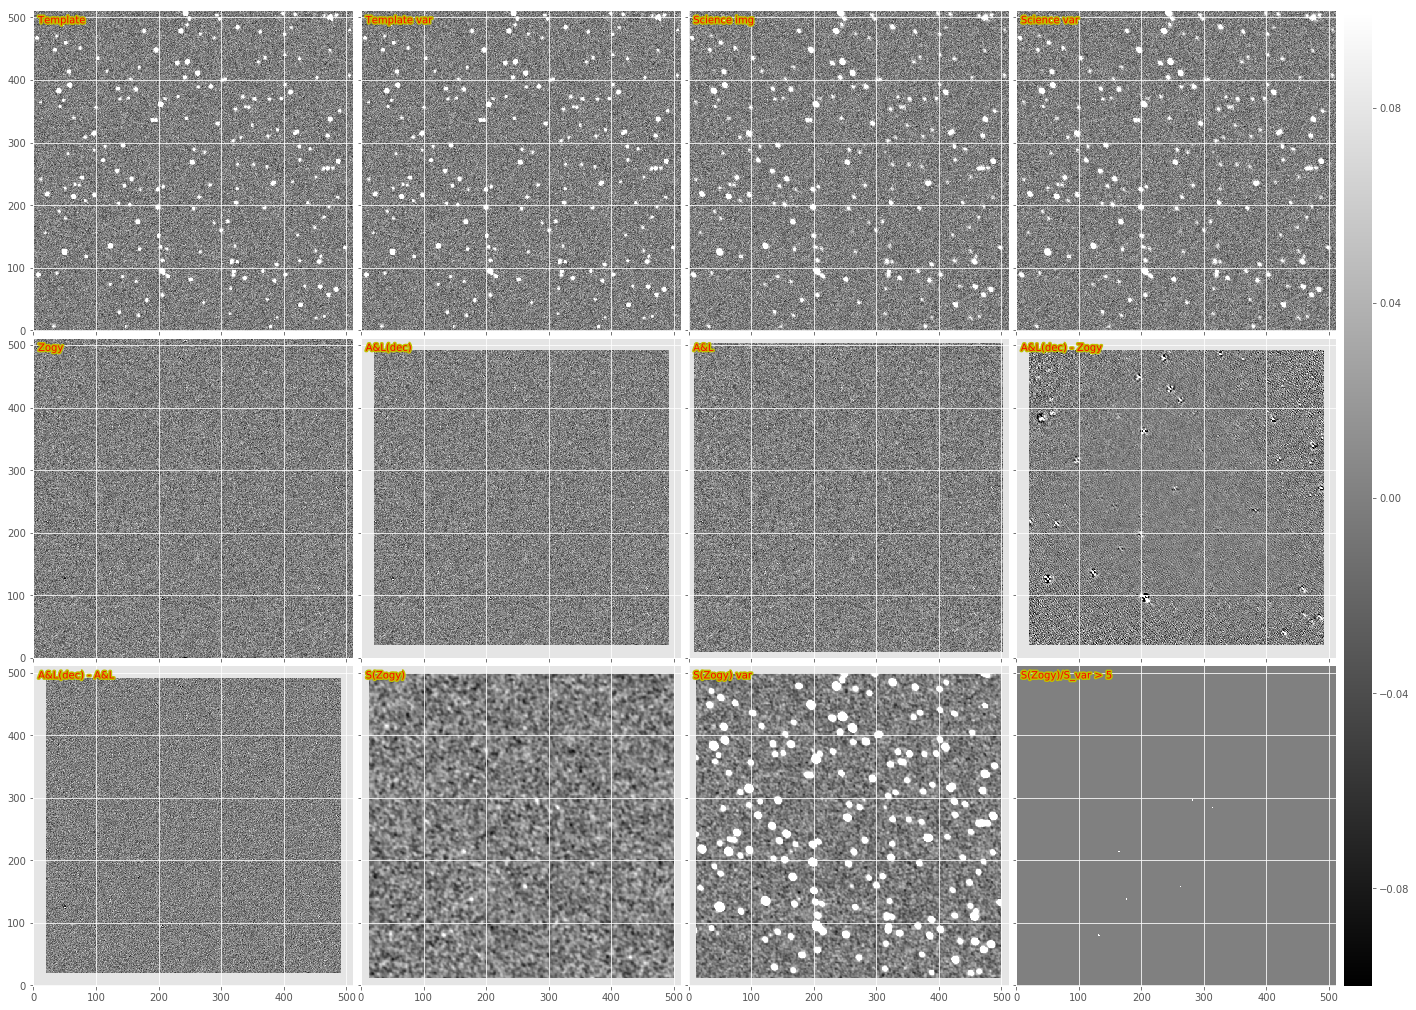

In [3]:
#dit.plotImageGrid((testObj.im1.im, testObj.im2.im), imScale=8)
testObj.doPlot(imScale=6, include_Szogy=True);

In [4]:
print dit.computeClippedImageStats(testObj.S_Zogy.im)
print dit.computeClippedImageStats(testObj.S_Zogy.var)
print dit.computeClippedImageStats(testObj.S_Zogy.im / testObj.S_Zogy.var)

stats(mean=0.0025505250345399214, stdev=0.15112390810275378, min=-0.61320814066903939, max=0.95891197086361268)
stats(mean=0.15258449506188609, stdev=0.00068424191971917336, min=0.14933816216108073, max=0.86989031653971094)
stats(mean=0.014433590192175796, stdev=0.98170417834663548, min=-3.9984692373690014, max=6.1185193049026321)


/Users/dreiss/lsstsw/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


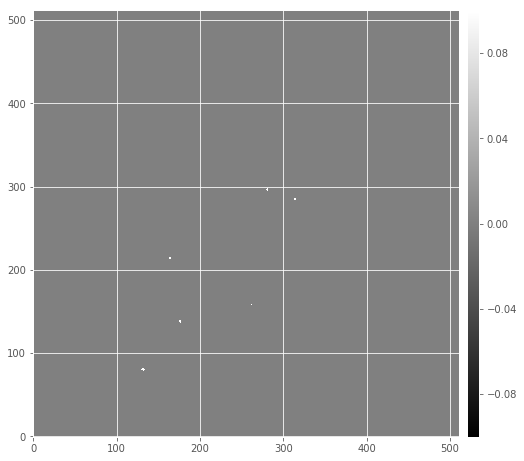

In [5]:
dit.plotImageGrid(((testObj.S_Zogy.im / testObj.S_Zogy.var > 5.) * 10.0,), imScale=8)

In [6]:
Scorr = testObj.S_Zogy.clone() #asAfwExposure()
#im = Scorr.getMaskedImage().getImage()
#var = Scorr.getMaskedImage().getVariance()
#im /= var
#var /= var
Scorr.im /= Scorr.var
Scorr.var /= Scorr.var
src = dit.tasks.doDetection(Scorr.asAfwExposure(), thresholdType='value', doSmooth=False, doMeasure=False)
dit.catalogToDF(src)

,base_CircularApertureFlux_12_0_flag,base_CircularApertureFlux_12_0_flag_apertureTruncated,base_CircularApertureFlux_12_0_flux,base_CircularApertureFlux_12_0_fluxSigma,base_CircularApertureFlux_17_0_flag,base_CircularApertureFlux_17_0_flag_apertureTruncated,base_CircularApertureFlux_17_0_flux,base_CircularApertureFlux_17_0_fluxSigma,base_CircularApertureFlux_25_0_flag,base_CircularApertureFlux_25_0_flag_apertureTruncated,...,ip_diffim_PsfDipoleFlux_neg_flux,ip_diffim_PsfDipoleFlux_neg_fluxSigma,ip_diffim_PsfDipoleFlux_pos_centroid_x,ip_diffim_PsfDipoleFlux_pos_centroid_xSigma,ip_diffim_PsfDipoleFlux_pos_centroid_y,ip_diffim_PsfDipoleFlux_pos_centroid_ySigma,ip_diffim_PsfDipoleFlux_pos_flag,ip_diffim_PsfDipoleFlux_pos_flux,ip_diffim_PsfDipoleFlux_pos_fluxSigma,parent
0,False,False,196.882754,21.307276,False,False,209.462007,30.199338,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,0
1,False,False,122.438433,21.283797,False,False,58.073958,30.149627,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,0
2,False,False,297.125982,21.236761,False,False,546.658639,30.149627,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,0
3,False,False,118.890738,21.260292,False,False,-52.412883,30.166206,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,0
4,False,False,432.050435,21.236761,False,False,642.548719,30.182777,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,0
5,False,False,238.878533,21.307276,False,False,276.991659,30.166206,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,0
6,False,False,279.205076,21.118712,False,False,165.150265,30.016662,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,0
